In [1]:

import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
import sklearn 

import os

from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

data = pd.read_csv("cancer_reg1.csv")

for i in range(len(data['binnedInc'])):
    orgVal  = data['binnedInc'][i]
    valsStr = orgVal[1:-1]
    vals      = valsStr.split(", ")
    newVal    = (float(vals[0]) + float(vals[1])) / 2 
    data['binnedInc'][i] = newVal

data = data.replace(np.nan, 0)
data 



C:\Users\morga\AppData\Local\Temp\ipykernel_28412\3333534307.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binnedInc'][i] = newVal


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,93564.75,39.3,...,0.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,49534.0,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,49534.0,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,43962.7,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,49534.0,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,46611.3,44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,49534.0,30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,52796.0,30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,49534.0,39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [2]:
X = data.drop(['TARGET_deathRate'], axis=1) 

y = data['TARGET_deathRate']

<AxesSubplot:>

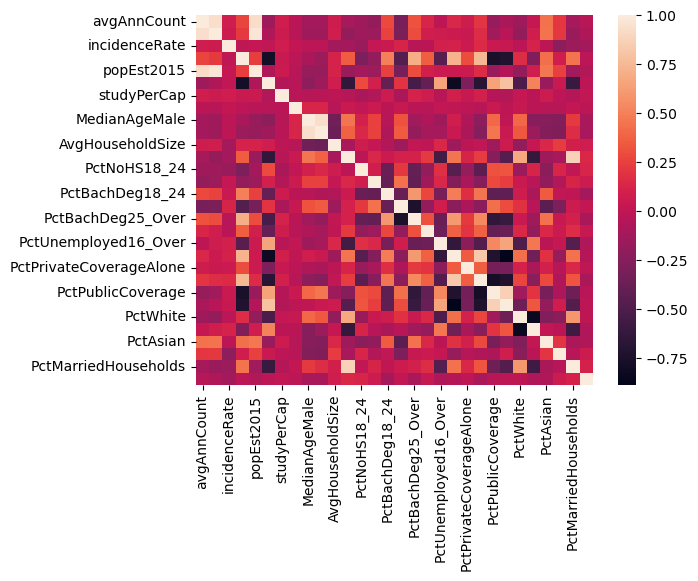

In [3]:
sns.heatmap(X.corr( ), annot=False)

In [4]:
sklearn.preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=False)

array([[ 0.55832793,  0.56151822,  0.76132099, ..., -0.03981779,
         0.24532391,  0.24101109],
       [-0.30600329, -0.23006748, -0.67217947, ...,  0.4997902 ,
        -0.89342793, -0.65838175],
       [-0.35614015, -0.26974596, -1.80688124, ...,  0.21717556,
         0.4870854 , -0.96239123],
       ...,
       [ 0.95777583, -0.27768165,  0.09680411, ...,  1.05119208,
         0.59498396,  1.09236803],
       [ 0.95777583, -0.26577811,  0.09680411, ...,  0.04215578,
         1.10174249,  0.97841465],
       [ 0.95777583, -0.2737138 ,  0.09680411, ..., -0.17828885,
         0.72984833,  1.68291827]])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

In [6]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [7]:
from sklearn.linear_model import OrthogonalMatchingPursuit
reg = OrthogonalMatchingPursuit(n_nonzero_coefs=20)
reg.fit(x_train, y_train)

C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


OrthogonalMatchingPursuit(n_nonzero_coefs=20)

In [8]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_RR_train = reg.predict(x_train)
y_pred_RR_test = reg.predict(x_test)

accuracy_RR_train = r2_score(y_train, y_pred_RR_train)
print("Training R2 for Ridge Regression Model: ", accuracy_RR_train)

accuracy_RR_test = r2_score(y_test, y_pred_RR_test)
print("Testing R2 for Ridge Regression Model: ", accuracy_RR_test)

RMSE_RR_train = sqrt(mean_squared_error(y_train, y_pred_RR_train))
print("RMSE for Training Data: ", RMSE_RR_train)

RMSE_RR_test = sqrt(mean_squared_error(y_test, y_pred_RR_test))
print("RMSE for Testing Data: ", RMSE_RR_test)

Training R2 for Ridge Regression Model:  0.5205963443808239
Testing R2 for Ridge Regression Model:  0.4949001826155702
RMSE for Training Data:  19.131054358281382
RMSE for Testing Data:  20.045821840284


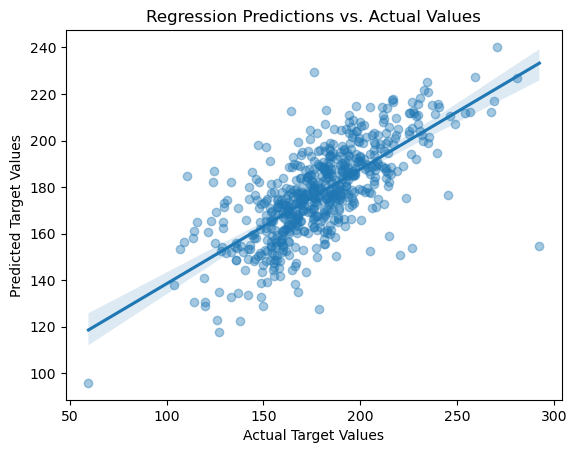

In [9]:
# Scatter plot 
sns.regplot(x=y_test, y=y_pred_RR_test, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Regression Predictions vs. Actual Values')
plt.show()